## Details:
* Date - The date of the observation.
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
df.columns = df.columns.str.lower()
df.head()

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
df['date'] = pd.to_datetime(df.date)

In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

date            0
averageprice    0
total volume    0
4046            0
4225            0
4770            0
total bags      0
small bags      0
large bags      0
xlarge bags     0
type            0
year            0
region          0
dtype: int64

In [24]:
df.describe().round(2)

,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [26]:
df.describe(include="O")

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


In [28]:
corr_matrix = df.corr(numeric_only=True).round(2)
corr_matrix

,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,year
averageprice,1.00,-0.19,-0.21,-0.17,-0.18,-0.18,-0.17,-0.17,-0.12,0.09
total volume,-0.19,1.00,0.98,0.97,0.87,0.96,0.97,0.88,0.75,0.02
4046,-0.21,0.98,1.00,0.93,0.83,0.92,0.93,0.84,0.70,0.00
4225,-0.17,0.97,0.93,1.00,0.89,0.91,0.92,0.81,0.69,-0.01
4770,-0.18,0.87,0.83,0.89,1.00,0.79,0.80,0.70,0.68,-0.04
total bags,-0.18,0.96,0.92,0.91,0.79,1.00,0.99,0.94,0.80,0.07
small bags,-0.17,0.97,0.93,0.92,0.80,0.99,1.00,0.90,0.81,0.06
large bags,-0.17,0.88,0.84,0.81,0.70,0.94,0.90,1.00,0.71,0.09
xlarge bags,-0.12,0.75,0.70,0.69,0.68,0.80,0.81,0.71,1.00,0.08
year,0.09,0.02,0.00,-0.01,-0.04,0.07,0.06,0.09,0.08,1.00


<Axes: >

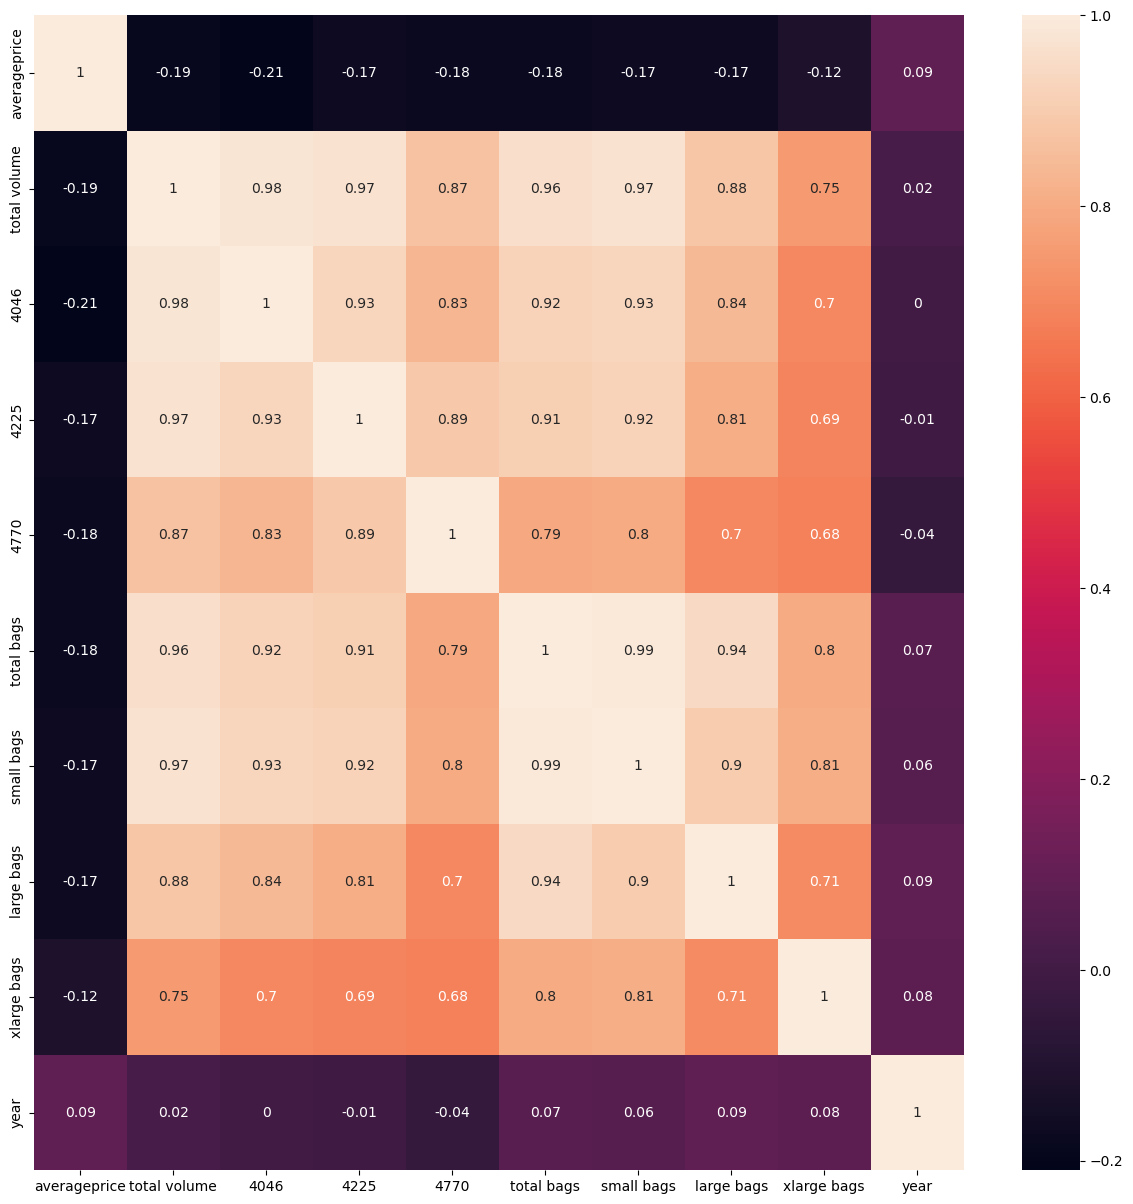

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = corr_matrix,annot=True)

In [36]:
numeric_col = df.select_dtypes(include="float").columns
numeric_col

Index(['averageprice', 'total volume', '4046', '4225', '4770', 'total bags',
       'small bags', 'large bags', 'xlarge bags'],
      dtype='object')

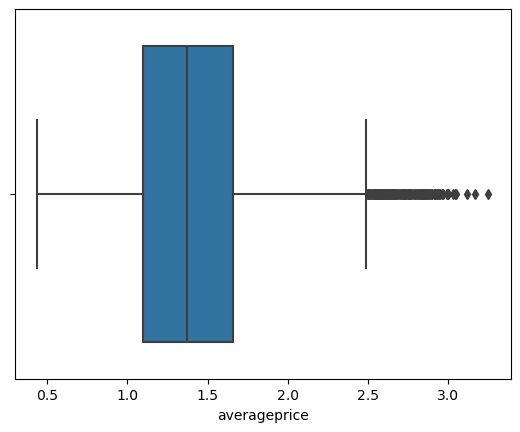

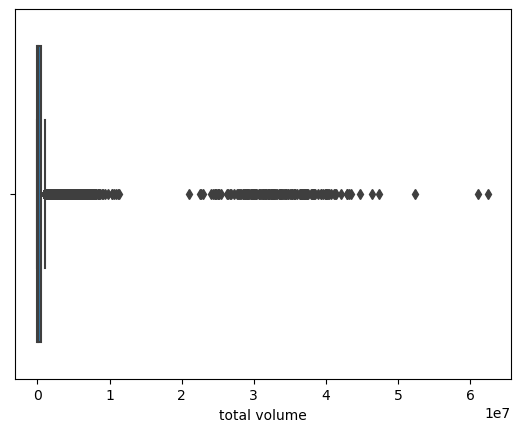

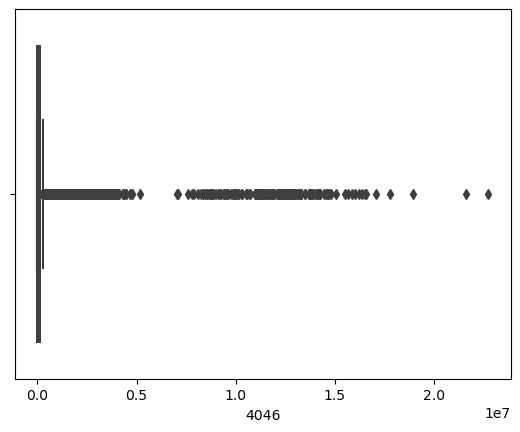

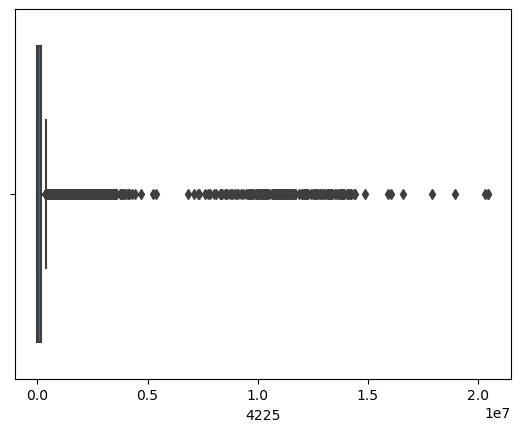

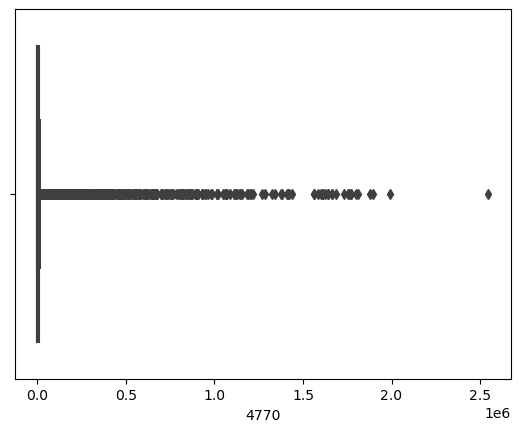

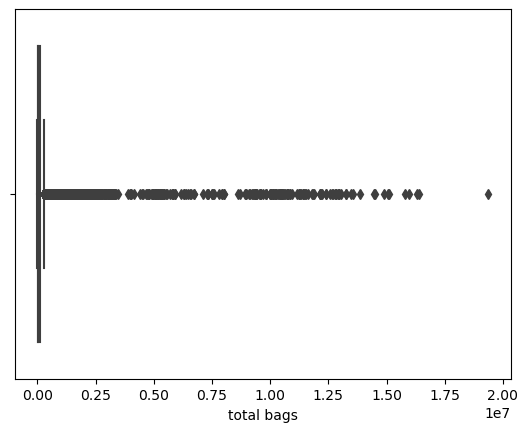

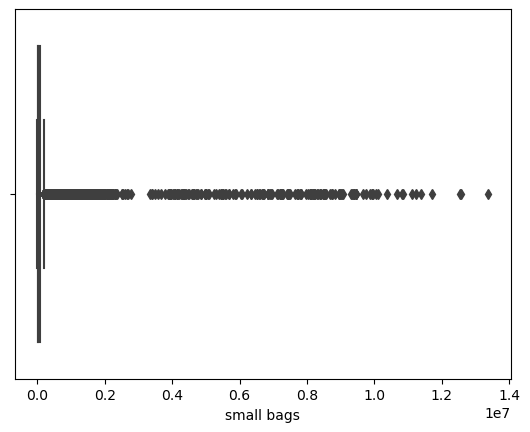

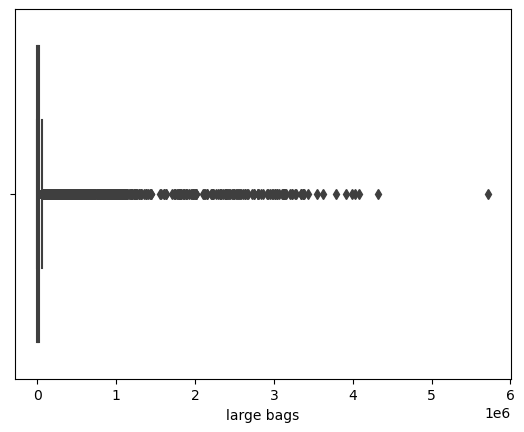

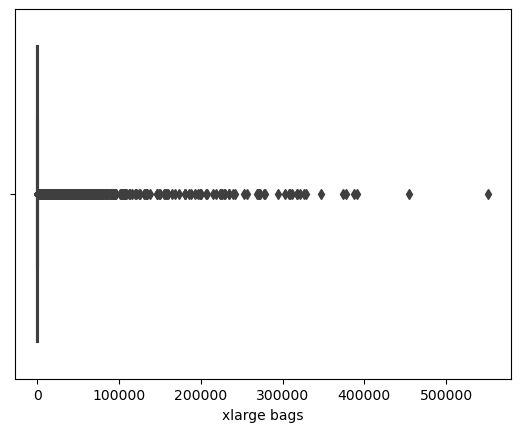

In [38]:
for col in numeric_col:
    sns.boxplot(data = df ,x=col)
    plt.show()

In [42]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

## Univariate Analysis

#### Q1: check distribution of average price during Jan 2018


In [43]:
df.head()

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [48]:
df['month'] = df['date'].dt.month_name()


In [53]:
year2018_jan = df[(df['year'] == 2018) & (df['month'] == 'January')]


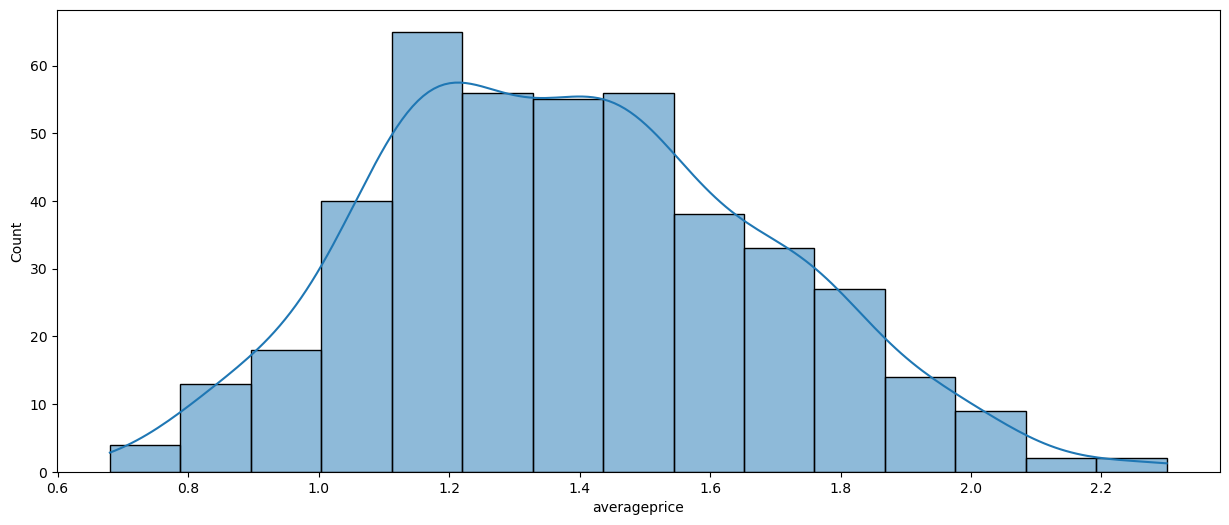

In [63]:
plt.figure(figsize=(15,6))
sns.histplot(data=year2018_jan,x="averageprice",kde=True);

#### Q2: using diffrent chart than you used in the previous one, plot the distribution for Jan 2018 Average price


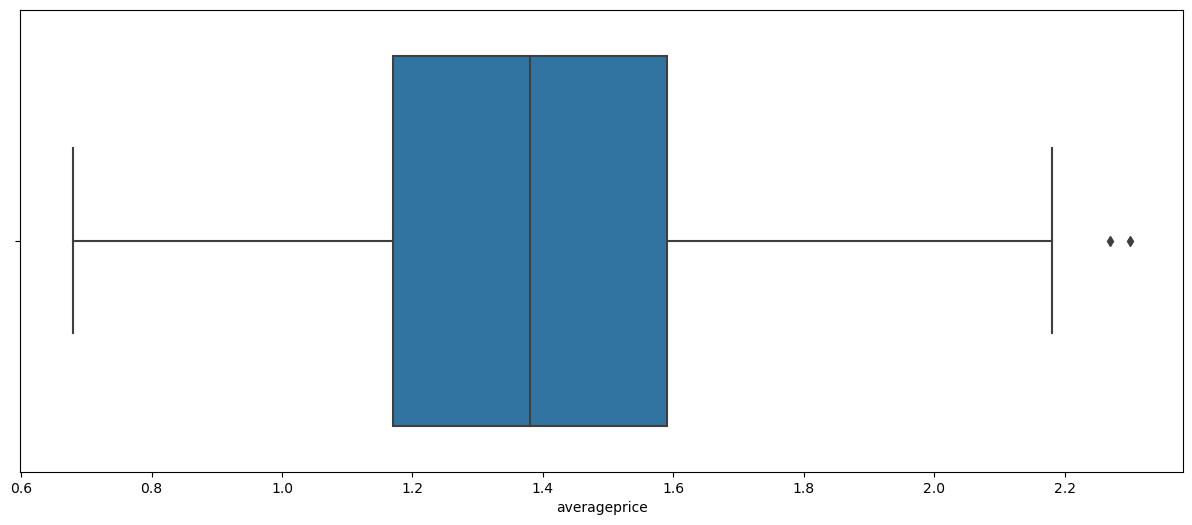

In [64]:
plt.figure(figsize=(15,6))
sns.boxplot(data=year2018_jan,x='averageprice');

#### Q3: Create box-plot for the Average price, but this time for all the dataset, and comment your conclusion


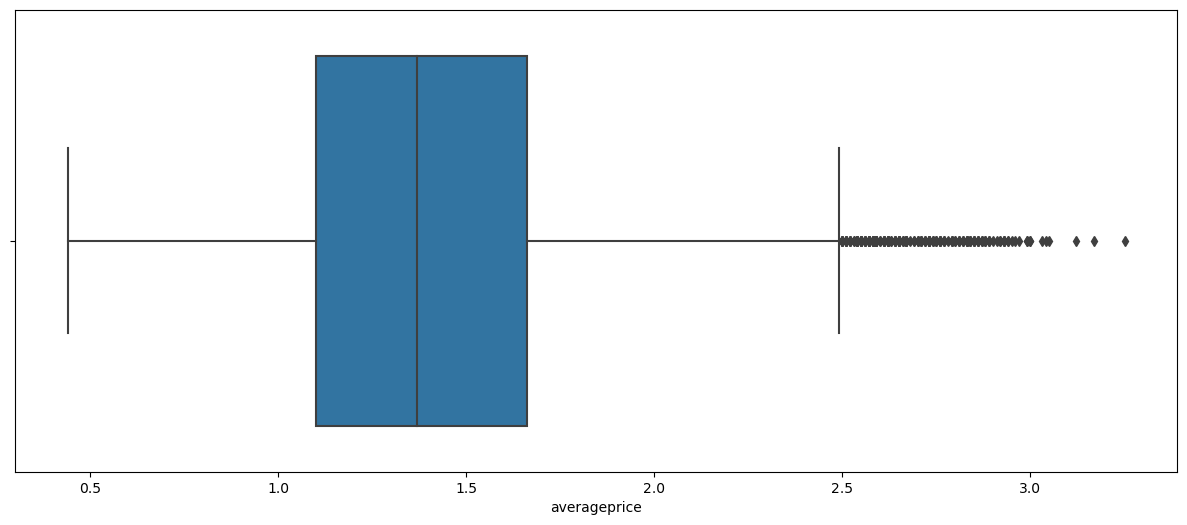

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='averageprice');
#outlair founded after ub 

# Bi/Multivariate

#### Q4: Create a tracing boxplots (multiple box-plots in one figure) that shows the average price for each month and colored by year to distnguish between them

<Axes: xlabel='month', ylabel='averageprice'>

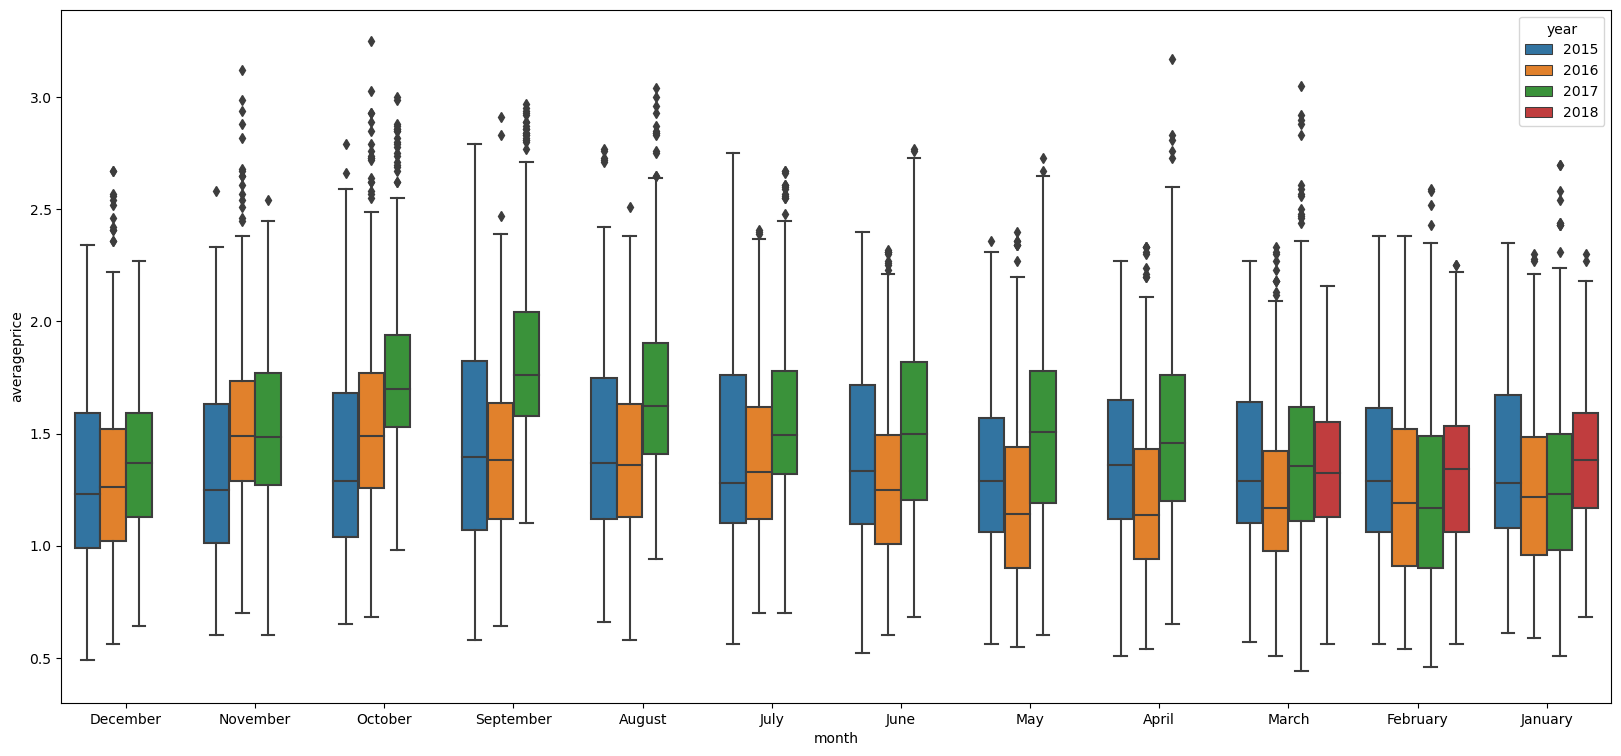

In [ ]:
plt.figure(figsize=(20,9))
sns.boxplot(data=df , y='averageprice',x='month',hue='year');
#no pattern by month


#### Q5: compare between average prcies of diffrent types of producs


<Axes: xlabel='averageprice', ylabel='Count'>

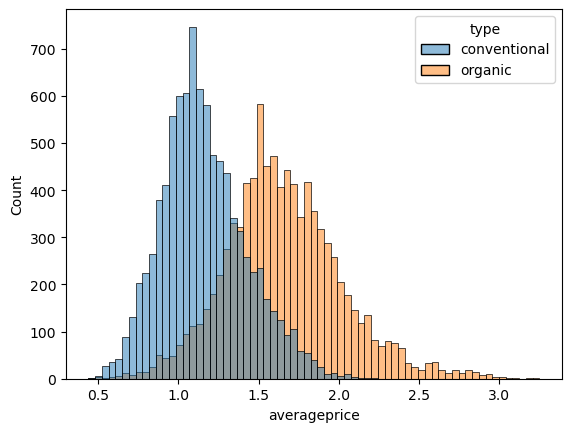

In [ ]:
sns.histplot(data=df , x='averageprice',hue='type')


<Axes: xlabel='averageprice', ylabel='Density'>

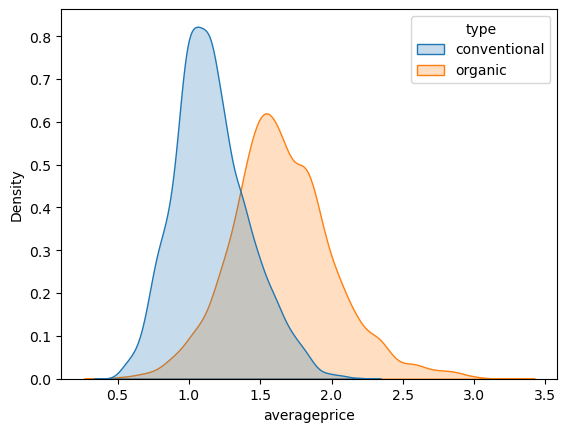

In [73]:
sns.kdeplot(data=df , x='averageprice',hue='type',fill=True)

#### Q6: what are the top 10 best selling region with pandas and with a chart?

In [74]:
df.head(2)

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December


In [82]:
top10 = df.groupby("region")["total volume"].sum().reset_index()
top10 = top10.sort_values(by='total volume',ascending=False).head(10)
top10

,region,total volume
51,TotalUS,5.864740e+09
52,West,1.086779e+09
6,California,1.028982e+09
45,SouthCentral,1.011280e+09
29,Northeast,7.132809e+08
46,Southeast,6.152384e+08
15,GreatLakes,5.896425e+08
25,Midsouth,5.083494e+08
22,LosAngeles,5.078965e+08
35,Plains,3.111885e+08


<Axes: xlabel='region', ylabel='total volume'>

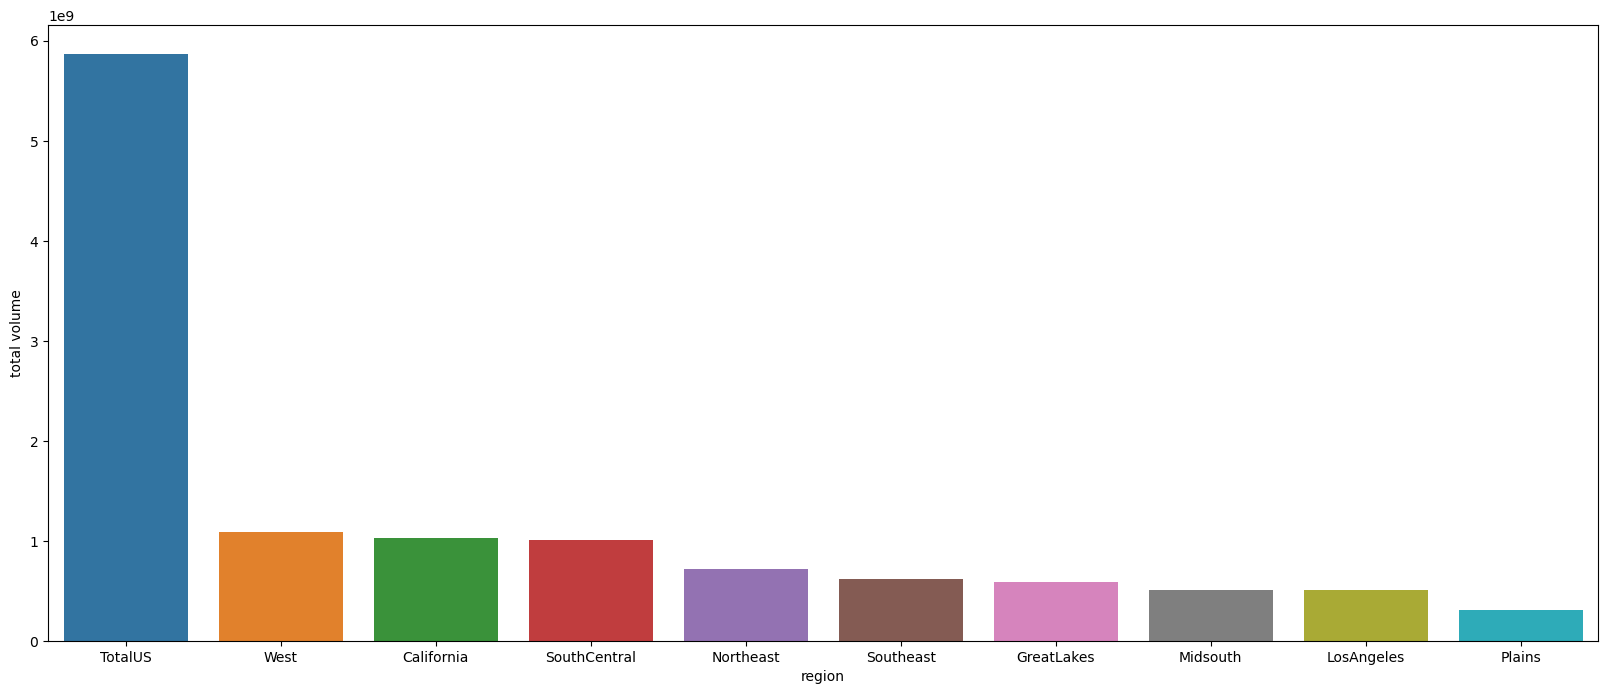

In [83]:
plt.figure(figsize=(20,8))
sns.barplot(data=top10,x="region",y="total volume")


#### Q7 : Create multiple a heat map to check if there is any correlation between Numerical columns.


<Axes: >

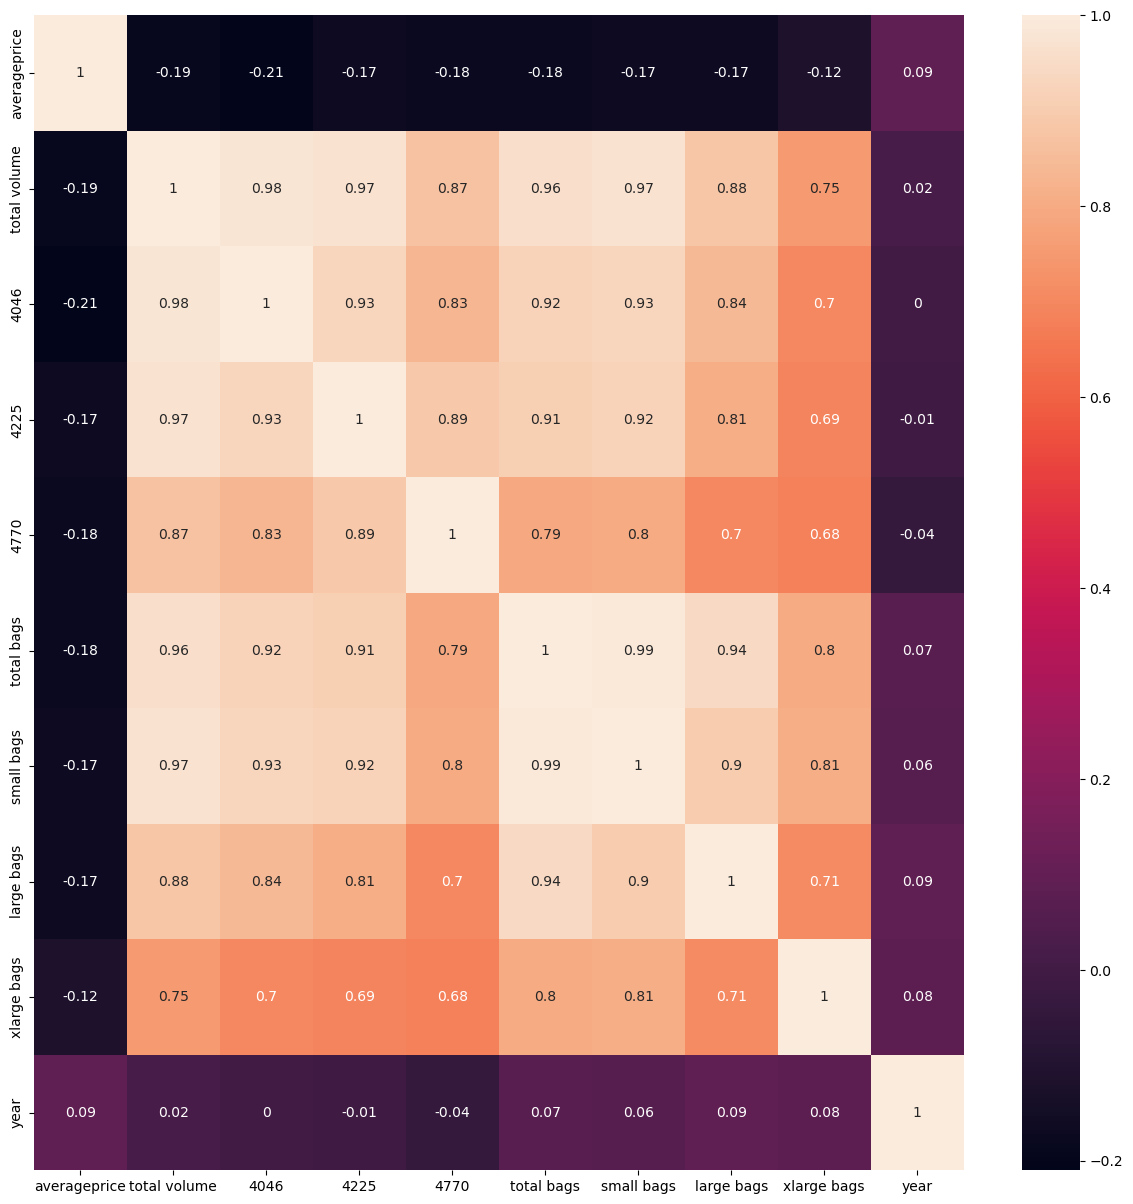

In [84]:
corr_matrix = df.corr(numeric_only=True).round(2)
corr_matrix

plt.figure(figsize=(15,15))
sns.heatmap(data = corr_matrix,annot=True)


#### Q9 : Create bar chart group for each year, reflects Average Price in each month


In [96]:
df['monthnum'] = df['date'].dt.month

In [97]:
monthyearavgss = df.groupby(["month",'year','monthnum'])['averageprice'].mean().reset_index()
monthyearavgss = monthyearavgss.sort_values(by='monthnum')
monthyearavgss

,month,year,monthnum,averageprice
16,January,2018,1,1.387431
15,January,2017,1,1.277500
14,January,2016,1,1.240185
13,January,2015,1,1.365046
10,February,2016,2,1.237106
9,February,2015,2,1.326944
12,February,2018,2,1.318704
11,February,2017,2,1.214792
23,March,2015,3,1.361981
26,March,2018,3,1.336458


<Axes: xlabel='month', ylabel='averageprice'>

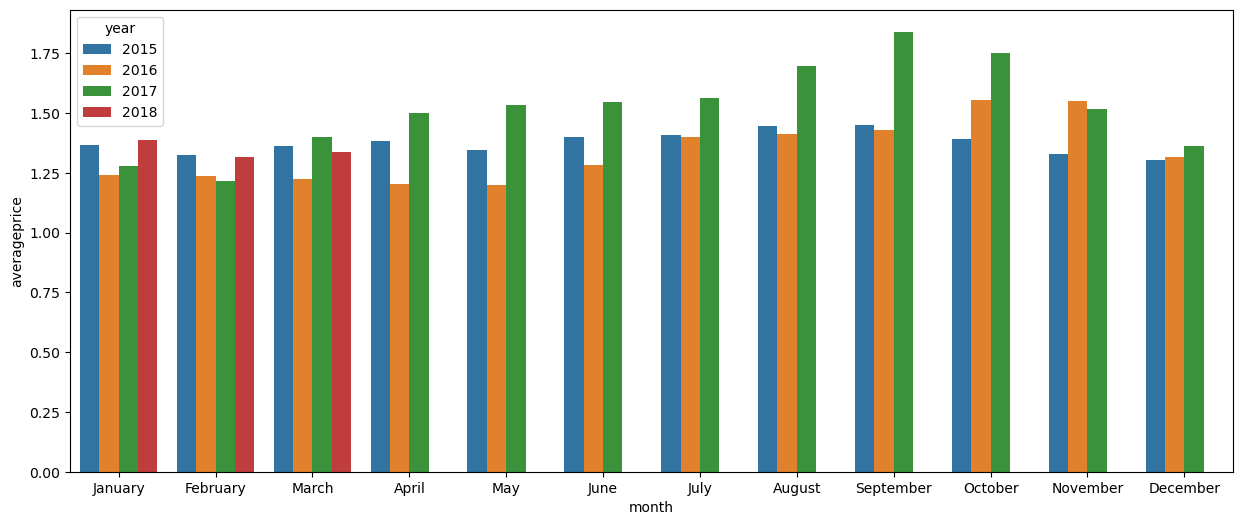

In [98]:
plt.figure(figsize=(15,6))
sns.barplot(data=monthyearavgss,x='month',y='averageprice',hue='year')

#### Create a new column for profit  

In [100]:
df['profit'] = df['averageprice'] * df['total volume']

#### what is the best selling Month

In [112]:
bestmonth = df.groupby("month")['profit'].sum().reset_index()
bestmonth = bestmonth.sort_values(by='profit',ascending=False)
bestmonth

,month,profit
4,January,1.771539e+09
7,March,1.730009e+09
3,February,1.648614e+09
5,July,1.529586e+09
8,May,1.515673e+09
1,August,1.343889e+09
10,October,1.342014e+09
0,April,1.327835e+09
6,June,1.312736e+09
11,September,1.207088e+09


<Axes: xlabel='month', ylabel='profit'>

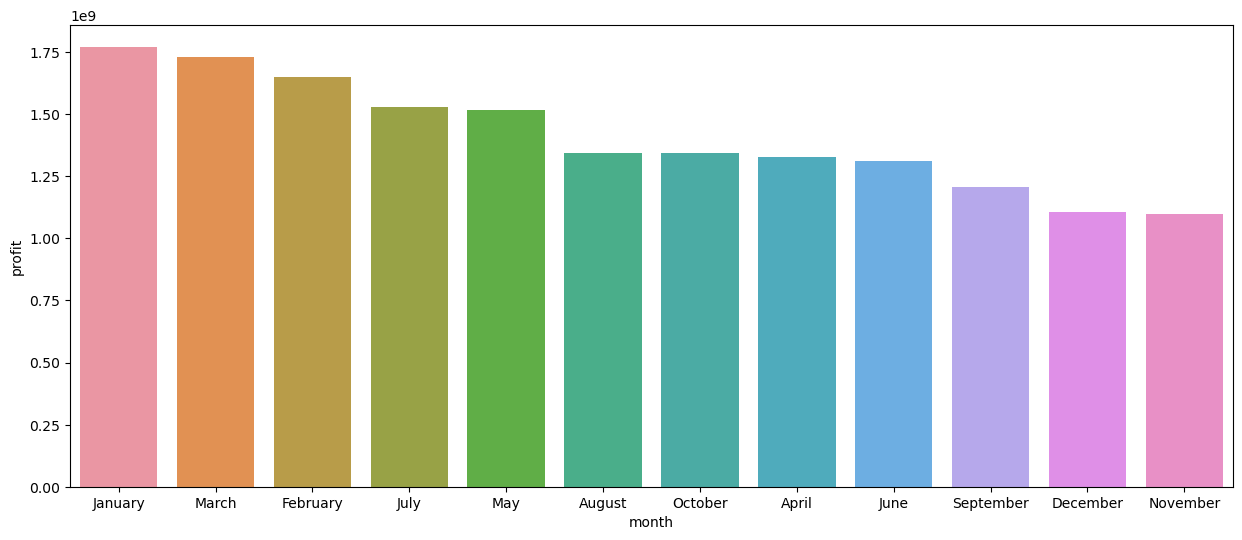

In [106]:
plt.figure(figsize=(15,6))
sns.barplot(data=bestmonth,x='month',y='profit')

### For each month what is the most selling type

In [108]:
df.head(2)

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region,month,monthnum,profit
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,12,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,12,74083.9230


In [119]:
bestmonthper = df.groupby(["month",'type','monthnum'])['profit'].sum().reset_index()
bestmonthper 

,month,type,monthnum,profit
0,April,conventional,4,1.271318e+09
1,April,organic,4,5.651709e+07
2,August,conventional,8,1.292198e+09
3,August,organic,8,5.169113e+07
4,December,conventional,12,1.061070e+09
5,December,organic,12,4.689922e+07
6,February,conventional,2,1.582465e+09
7,February,organic,2,6.614860e+07
8,January,conventional,1,1.705844e+09
9,January,organic,1,6.569540e+07


In [121]:
bestmonthper = bestmonthper.sort_values(by='monthnum')
bestmonthper

,month,type,monthnum,profit
8,January,conventional,1,1.705844e+09
9,January,organic,1,6.569540e+07
6,February,conventional,2,1.582465e+09
7,February,organic,2,6.614860e+07
15,March,organic,3,7.583001e+07
14,March,conventional,3,1.654179e+09
0,April,conventional,4,1.271318e+09
1,April,organic,4,5.651709e+07
17,May,organic,5,5.952082e+07
16,May,conventional,5,1.456152e+09


<Axes: xlabel='month', ylabel='profit'>

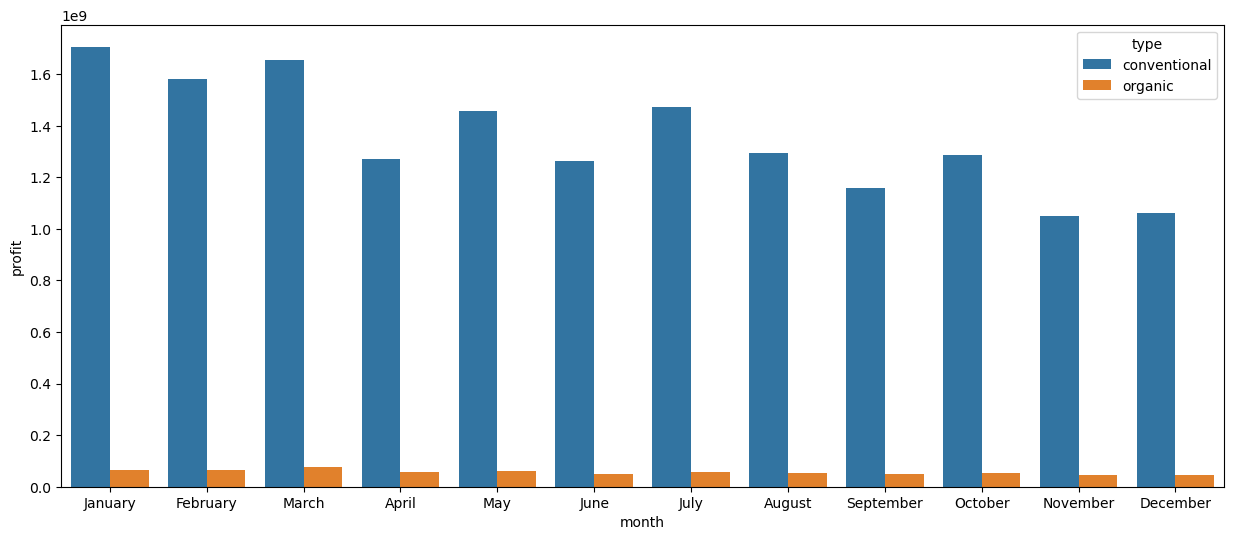

In [122]:
plt.figure(figsize=(15,6))
sns.barplot(data=bestmonthper,x='month',y='profit',hue='type')

In [ ]:
monthtype1 =df.groupby(['month','type'])['profit'].sum().reset_index() # retrun sum for each type for each month
monthtypeidmax = monthtype1.groupby('month')['profit'].idxmax() #return the index of the max profit for each month
monthtypedfrow = monthtype1.loc[monthtypeidmax] # return row of the max index from df
monthtypedfrow


,month,type,profit
0,April,conventional,1.271318e+09
2,August,conventional,1.292198e+09
4,December,conventional,1.061070e+09
6,February,conventional,1.582465e+09
8,January,conventional,1.705844e+09
10,July,conventional,1.472206e+09
12,June,conventional,1.262411e+09
14,March,conventional,1.654179e+09
16,May,conventional,1.456152e+09
18,November,conventional,1.051428e+09
